# This is a tutorial for data simulation for t-test power analysis and regression intro

TEWA 1 Tutorial 4

3 Nov, 2022

written by Jozsef Arato, Vienna Cognitive Science Hub, University of Vienna

import libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, linalg

## Data simulation for a t-test

in the first task, we simulate a scenario when comparing the effect of new drug on reaction time performance to a placebo.
We will also assume that the drug is  better than the placebo, so reaction time will be sampled from the population mean of 500 ms, and SD of 100 for the target group, and 520 for the control group

first task is to simulate 2 groups of 20 participants, based on the above information (we are assuming normal distribution here)

---



In [ ]:
Data1 = np.random.normal(500, 100, 20)
Data2 = np.random.normal(520, 100, 20)
print(stats.ttest_ind(Data1, Data2))
print(stats.ttest_ind(Data1, Data2)[1])

Ttest_indResult(statistic=2.506952891250026, pvalue=0.016572678912262127)
0.016572678912262127


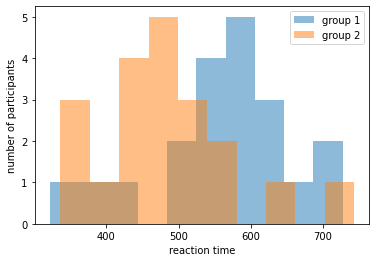

In [ ]:
plt.hist(Data1, alpha=0.5, label="group 1")
plt.hist(Data2, alpha=0.5, label="group 2")
plt.xlabel("reaction time")
plt.ylabel("number of participants")
plt.legend()

once this is done, we can compare the two groups with the independent samples t-test

based on the above, repeat the process 1000 times,
and store the p-value of each iteration's t-test in a numpy array


In [ ]:
Nsim = 1000
pvalues = np.zeros(Nsim)
for i in range(Nsim):
    Data1 = np.random.normal(500, 100, 100)
    Data2 = np.random.normal(520, 100, 100)
    pvalues[i] = stats.ttest_ind(Data1, Data2)[1]
# if i<5:
#  print(i, pvalues[0:10])

1. visualize the obtained p values with a histrogam
2. calculate how many times you obtained significant difference (p value below 0.05)
3. add vertical line, for the significance threshold on the histrogram

significance, p<  .05:  273
power of design  0.273


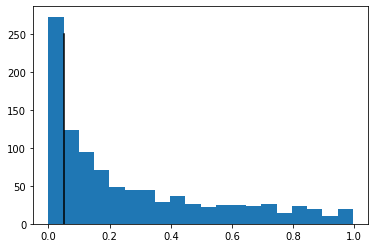

In [ ]:
plt.hist(pvalues, bins=20)

print("significance, p<  .05: ", np.sum(pvalues < 0.05))
print("power of design ", np.sum(pvalues < 0.05) / Nsim)

plt.plot([0.05, 0.05], [0, Nsim / 4], color="k")  # vertical line

write a function SimulateT, using the code above, that takes 4 input variables:
1. mean of group 1,
2. mean of group 2
3. the SD for both groups
4. and the number of particpants, (equal for both groups)

the function should simulate data 1000 times, performs the above analysis and returns only the proportion of significant tests


In [ ]:
def SimulateT(mean1, mean2, sd, Npart):
    Ns = 1000
    pvalues = np.zeros(Nsim)
    for i in range(Nsim):
        Data1 = np.random.normal(mean1, sd, Npart)
        Data2 = np.random.normal(mean2, sd, Npart)
        pvalues[i] = stats.ttest_ind(Data1, Data2)[1]
    return np.sum(pvalues < 0.05) / Ns

In [ ]:
SimulateT(500, 520, 100, 20)

0.097

### systematic simulation
once this is done, we will keep the mean fixed at 500 & 520, but systematically change the SD in 10 steps: from 20 to 200 ms

1. using your function above, calculate the proportion of significant tests for all of these combinations.
2.  store the results it in a  numpy array
3. visualize the result with  plt.plot
4. make the figure nice (ticks, labels, fontsize)

In [ ]:
NSteps = 10
SDs = np.linspace(20, 200, NSteps)

print(SDs, len(SDs))
Powers = np.zeros(NSteps)
for i in range(NSteps):
    Powers[i] = SimulateT(500, 520, SDs[i], 20)

[ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200.] 10


In [ ]:
Powers = np.zeros(NSteps)
for i, sd in enumerate(SDs):
    Powers[i] = SimulateT(500, 520, sd, 20)

Text(0, 0.5, 'Power')

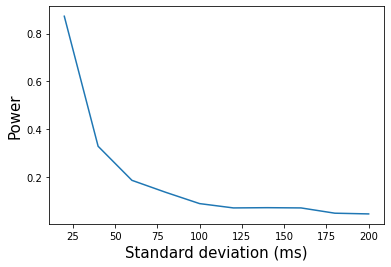

In [ ]:
plt.plot(SDs, Powers)
plt.xlabel("Standard deviation (ms)", fontsize=15)
plt.ylabel("Power", fontsize=15)


using the same function, change systematically the  number of participants in 8 steps: from 8 to 64 participants
store the results in a numpy array





In [ ]:
NSteps = 8
Numparts = np.linspace(8, 64, NSteps)
Powers = np.zeros(NSteps)
for i in range(NSteps):
    Powers[i] = SimulateT(500, 520, 50, int(Numparts[i]))
# your code
# your code
# your code

In [ ]:
np.intp(np.linspace(8, 64, 8))

array([ 8, 16, 24, 32, 40, 48, 56, 64])

In [ ]:
?np.random.normal

Text(0, 0.5, 'Power')

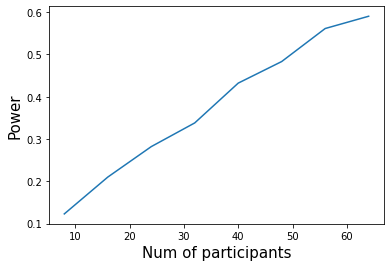

In [ ]:
plt.plot(Numparts, Powers)
plt.xlabel("Num of participants", fontsize=15)
plt.ylabel("Power", fontsize=15)

lecture continues here!

## demo of 3 options for counting and accesssing elements of list/array with  embedded for cycles
and using 2d numpy array to store calculation results with indexing



In [ ]:
List1 = ["dog", "cat", "mouse"]
List2 = ["vienna", "graz"]

### option 1 -  iterate list + counters

In [ ]:
NumCombinedChar = np.zeros((len(List1), len(List2)))
c1 = 0
for l1 in List1:
    c2 = 0
    for l2 in List2:
        print(c1, c2, l1, l2)
        NumCombinedChar[c1, c2] = len(l1) + len(
            l2
        )  # calcualte and store combined word length
        c2 += 1
    c1 += 1
print(NumCombinedChar)

0 0 dog vienna
0 1 dog graz
1 0 cat vienna
1 1 cat graz
2 0 mouse vienna
2 1 mouse graz
[[ 9.  7.]
 [ 9.  7.]
 [11.  9.]]


### option 2 -  range  + indexing



In [ ]:
NumCombinedChar = np.zeros((len(List1), len(List2)))
for c1 in range(len(List1)):
    for c2 in range(len(List2)):
        print(c1, c2, List1[c1], List1[c2])
        NumCombinedChar[c1, c2] = len(List1[c1]) + len(
            List2[c2]
        )  # calcualte and store combined word length
print(NumCombinedChar)

0 0 dog dog
0 1 dog cat
1 0 cat dog
1 1 cat cat
2 0 mouse dog
2 1 mouse cat
[[ 9.  7.]
 [ 9.  7.]
 [11.  9.]]


### option 3 -  enumerate


In [ ]:
NumCombinedChar = np.zeros((len(List1), len(List2)))

for c1, l1 in enumerate(List1):
    for c2, l2 in enumerate(List2):
        print(c1, c2, l1, l2)
        NumCombinedChar[c1, c2] = len(l1) + len(
            l2
        )  # calcualte and store combined word length
print(NumCombinedChar)

0 0 dog vienna
0 1 dog graz
1 0 cat vienna
1 1 cat graz
2 0 mouse vienna
2 1 mouse graz
[[ 9.  7.]
 [ 9.  7.]
 [11.  9.]]


### simulating data with a linear regression model

growth of infant .5 cm/month  (B1)

starting heigth 50 cm  (B0)

error 8 cm  

n=40

simulate for ages 0 to 36 months

write the linear equation with normal error, to simualte data for your first simulation with a regression model for Y

In [ ]:
N = 40
B0 = 50
B1 = 0.5
X = np.linspace(0, 36, N)
Y = B0 + B1 * X + np.random.normal(0, 8, N)

Text(0, 0.5, 'Heigth (cm)')

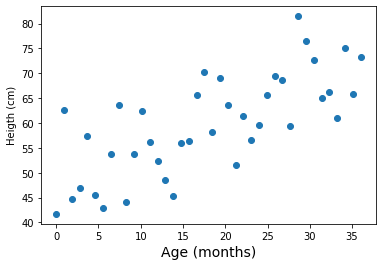

In [ ]:
plt.scatter(X, Y)
plt.xlabel("Age (months)", fontsize=14)
plt.ylabel("Heigth (cm)")

we will use the least squares method, to fit a linear regression


to fit the intercept, we will need a column of ones, that is added to the predictors.

predictor matrix-- design matrix

In [ ]:
from scipy import linalg

In [ ]:
print(X)
XX = np.column_stack((np.ones(N), X))
print(XX)
pars = linalg.lstsq(XX, Y)[0]

[ 0.          0.92307692  1.84615385  2.76923077  3.69230769  4.61538462
  5.53846154  6.46153846  7.38461538  8.30769231  9.23076923 10.15384615
 11.07692308 12.         12.92307692 13.84615385 14.76923077 15.69230769
 16.61538462 17.53846154 18.46153846 19.38461538 20.30769231 21.23076923
 22.15384615 23.07692308 24.         24.92307692 25.84615385 26.76923077
 27.69230769 28.61538462 29.53846154 30.46153846 31.38461538 32.30769231
 33.23076923 34.15384615 35.07692308 36.        ]
[[ 1.          0.        ]
 [ 1.          0.92307692]
 [ 1.          1.84615385]
 [ 1.          2.76923077]
 [ 1.          3.69230769]
 [ 1.          4.61538462]
 [ 1.          5.53846154]
 [ 1.          6.46153846]
 [ 1.          7.38461538]
 [ 1.          8.30769231]
 [ 1.          9.23076923]
 [ 1.         10.15384615]
 [ 1.         11.07692308]
 [ 1.         12.        ]
 [ 1.         12.92307692]
 [ 1.         13.84615385]
 [ 1.         14.76923077]
 [ 1.         15.69230769]
 [ 1.         16.61538462]

In [ ]:
pars

array([47.53873634,  0.67946127])

In [ ]:
np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / np.sum((X - np.mean(X)) ** 2)

0.488303201589606

plot the obtained regression line, together with the data

Text(0, 0.5, 'Heigth (cm)')

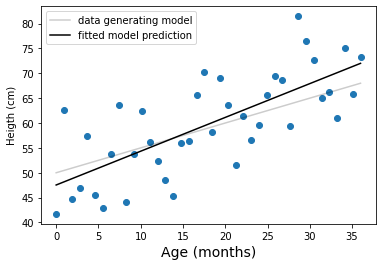

In [ ]:
plt.scatter(X, Y)
plt.plot(X, B0 + X * B1, color="k", alpha=0.2, label="data generating model")
plt.plot(X, pars[0] + X * pars[1], color="k", label="fitted model prediction")
plt.legend()
plt.xlabel("Age (months)", fontsize=14)
plt.ylabel("Heigth (cm)")

## polynomial regression

In [ ]:
XX = np.column_stack((np.ones(N), X, X**2))
pars = linalg.lstsq(XX, Y)[0]
print(pars)

[4.75837426e+01 6.71762827e-01 2.13845660e-04]


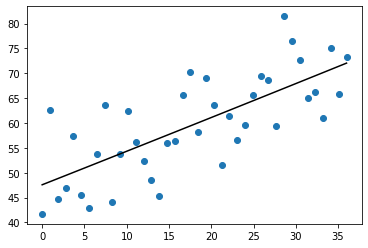

In [ ]:
plt.scatter(X, Y)
plt.plot(X, pars[0] + pars[1] * X + pars[2] * X**2, color="k")

[ 4.72152339e+01  1.33181130e+00 -7.37687930e-02  1.52775894e-03]


regression prediction as matrix  multiplication:

linear algebra series by 3blue1brown: https://www.youtube.com/watch?v=kjBOesZCoqc&list=PL0-GT3co4r2y2YErbmuJw2L5tW4Ew2O5B

matrix mulitiplication of design matrix with predictor weights results in predicted Y values.

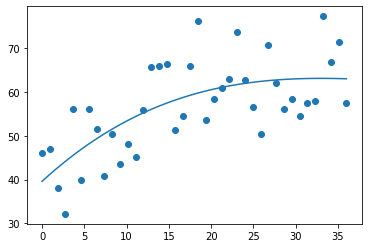

In [ ]:
plt.scatter(X, Y)
plt.plot(X, np.matmul(XX, pars))

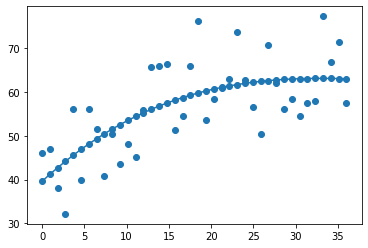

In [ ]:
XX = np.column_stack((np.ones(N), X, X**2, X**3))
pars = linalg.lstsq(XX, Y)[0]
plt.scatter(X, Y)
plt.plot(X, np.matmul(XX, pars), linestyle="-", marker="o")
# plt.plot(X,np.matmul(XX,pars))


## homework 1

simulating t-test for combinations of group size and standard deviation:
use all combinations of SD-s and groups sizes above, to simulate 80 scenarios, and store the significant t-test in a 2d numpy array

use the pcolor function of pyplot, to visualize the result
 adding x and y labels (for the parameters)


what do you observe and why? Write a few sentences

## homework 2
simulation with no mean difference, make a similar systematic simulation,
but with no mean difference (eg: ineffective drug) and calculate the propotion of significant test as you maniupate the SD and the sample size.
what do you observe and why could that be the case?



once you are ready with the figure, compare it to the previous figure, from the the true difference simulation..

what do you observe? Why?

write a short answer (max 5 sentences), and submit to the "texteingabe" in moodle

now you do not need to submit the code, only the figure you have created!
so save the figure and upload it to the moodle homework submission form


